In [2]:
# https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6

In [487]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

## WITHOUT 0 and GOOGL

In [392]:
dataset = pd.read_csv("analysis_data/analysis_all_without_googl.csv", index_col=0)
dataset = dataset.dropna()
dataset.head()

,volatility,aapl,amzn,fb,msft,ko,amt,hd,jpm,gs,pfe
date,,,,,,,,,,,
2022-02-02,22.090000,0.097277,-0.027943,0.086943,0.166354,0.833333,0.796825,0.651515,0.133515,0.583356,0.078622
2022-02-03,24.350000,0.179013,0.056630,0.126251,0.184344,-0.071428,0.833333,0.220106,-0.263505,0.555440,0.178556
2022-02-04,23.219999,0.112561,0.131079,0.129666,0.087896,0.476852,0.999999,0.372199,0.220000,0.389322,0.125115
2022-02-07,22.860001,0.203765,0.144420,0.119324,0.216208,0.182222,0.666666,0.640211,0.240431,0.403356,0.229981
2022-02-08,21.440001,0.281139,0.271328,0.084360,0.288758,0.126984,0.483333,0.395238,0.429000,0.568965,0.114804


/var/folders/0j/h3cqhtvd08g48k364rs9wzm40000gn/T/ipykernel_71503/3567352224.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


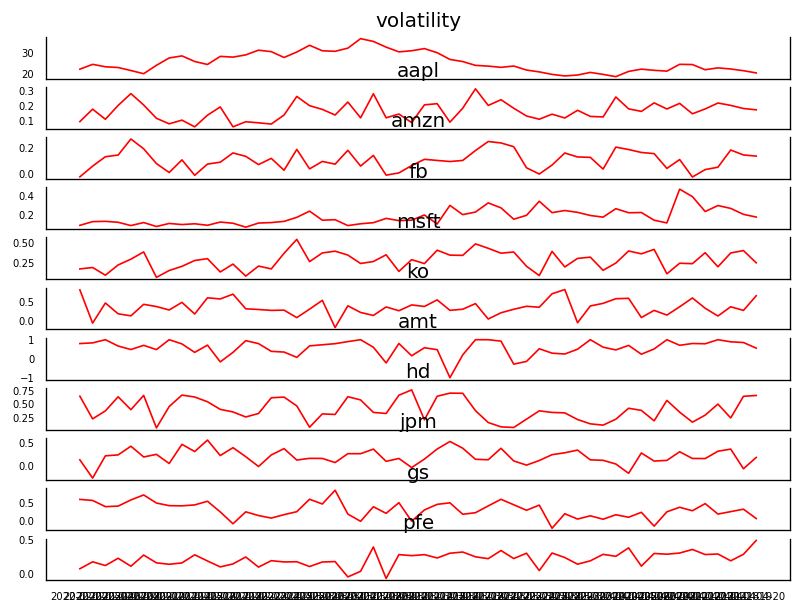

In [393]:
# Plot before data transformation
fig, axes = plt.subplots(nrows=11, ncols=1, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
    data = dataset[dataset.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [412]:
msft_dataset = dataset[['aapl','volatility']]

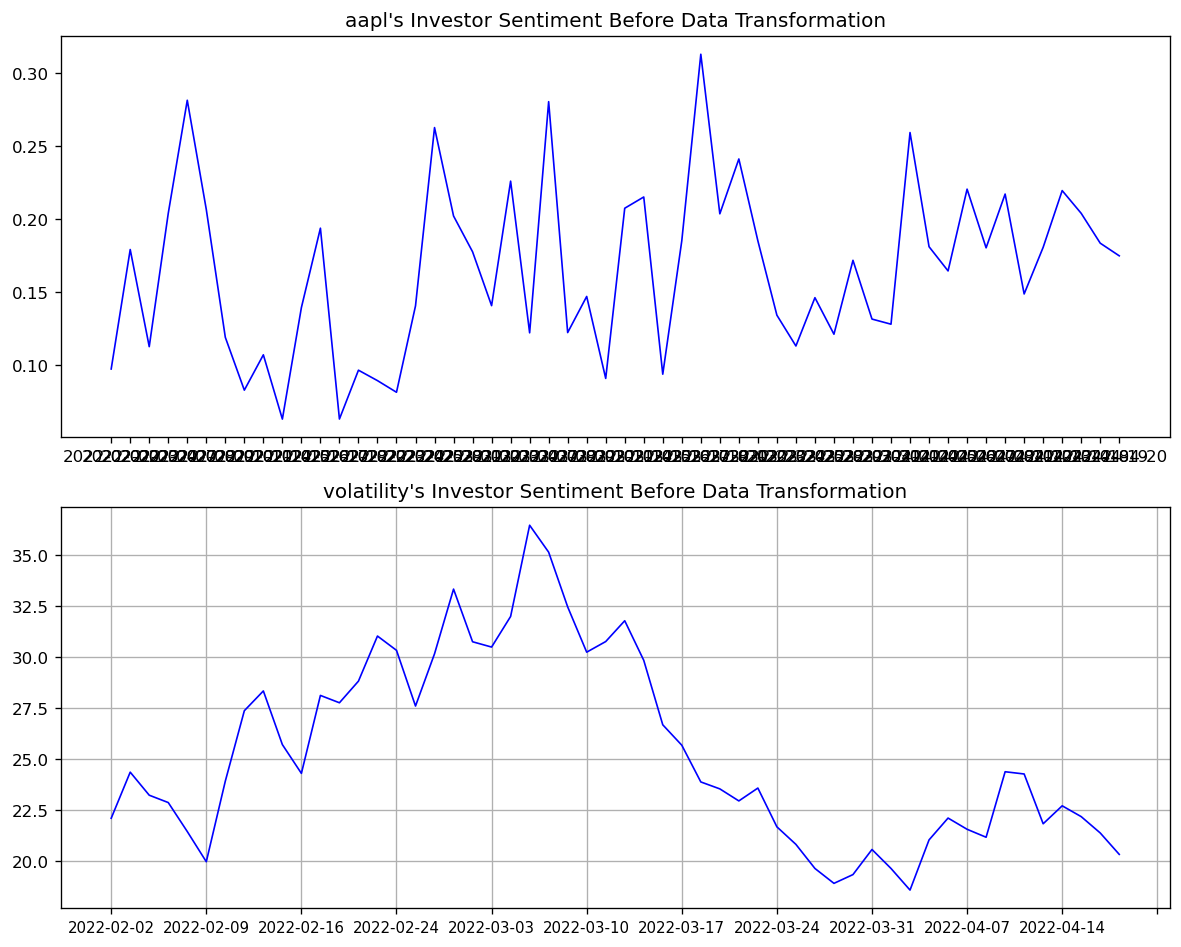

In [413]:
# Plot BEFORE data transformation

fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
    d = msft_dataset[msft_dataset.columns[i]]
    ax.plot(d, color='blue', linewidth=1)
    # Decorations
    ax.tick_params(labelsize=10)
    plt.xticks(fontsize=9, rotation=0)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax.set_title(msft_dataset.columns[i]+ "'s Investor Sentiment" +' ' + 'Before Data Transformation')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
#     ax.spines['top'].set_alpha(0)
#     plt.tick_params(axis='x',direction='in')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
stat,p = stats.normaltest(dataset.volatility)
print("Statistics = %.3f, p=%.3f" % (stat,p))

alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis')

Statistics = 5.253, p=0.072
Data looks Gaussian (fail to reject null hypothesis)


In [14]:
print("Kurtosis of normal distribustion: {}". format(stats.kurtosis(dataset.volatility)))
print("Skewness of normal distribustion: {}". format(stats.skew(dataset.volatility)))

Kurtosis of normal distribustion: -0.8081996072435254
Skewness of normal distribustion: 0.512485274328066


In [15]:
print("Kurtosis of normal distribustion: {}". format(stats.kurtosis(dataset.fb)))
print("Skewness of normal distribustion: {}". format(stats.skew(dataset.fb)))

Kurtosis of normal distribustion: 1.3732319719629897
Skewness of normal distribustion: 1.1911699638993944


count    54.000000
mean     25.344259
std       4.630402
min      18.570000
25%      21.579999
50%      24.085000
75%      29.575000
max      36.450001
Name: volatility, dtype: float64

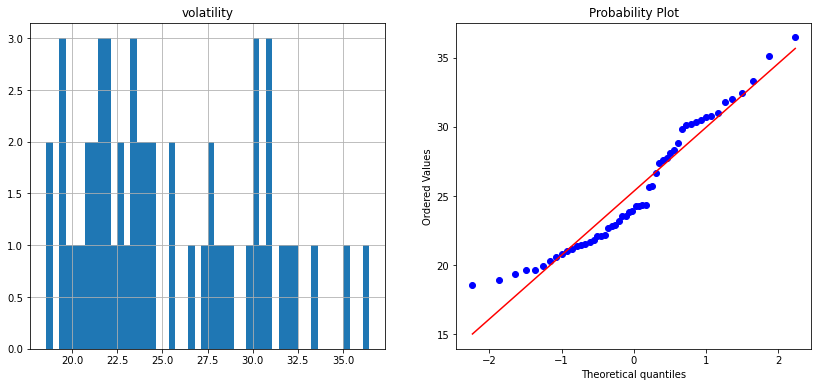

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
dataset['volatility'].hist(bins=50)
plt.title('volatility')
plt.subplot(1,2,2)
stats.probplot(dataset['volatility'], plot=plt);
dataset.volatility.describe().T

count    54.000000
mean     25.344259
std       4.630402
min      18.570000
25%      21.579999
50%      24.085000
75%      29.575000
max      36.450001
Name: volatility, dtype: float64

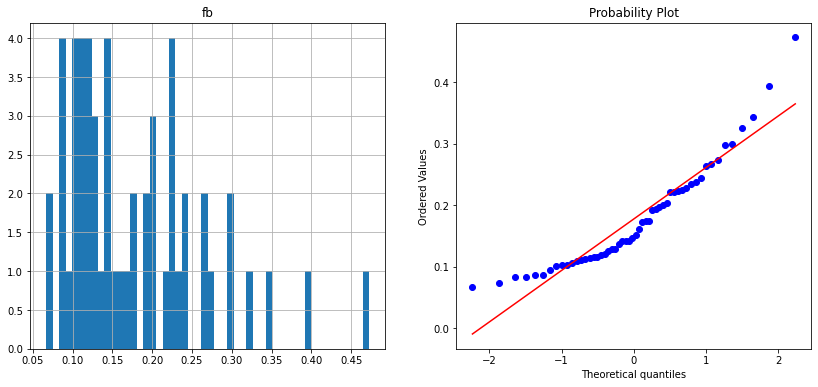

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
dataset['fb'].hist(bins=50)
plt.title('fb')
plt.subplot(1,2,2)
stats.probplot(dataset['fb'], plot=plt);
dataset.volatility.describe().T

In [17]:
# plots the autocorrelation plots for each stock's price at 50 lags
for i in dataset:
    plt_acf(dataset[i], lags = 50)
    plt.title('ACF for %s' % i)
    plt.show()

NameError: name 'plt_acf' is not defined

## 1. time series split train and test

In [ ]:
# time series split train and test

In [131]:
n_obs=5
X_train, X_test = dataset[0:-n_obs], dataset[-n_obs:]
print(X_train.shape, X_test.shape)

(49, 11) (5, 11)


## 2. Data Transformation

In [132]:
# diff transformation
X_train_transformed = X_train.diff().dropna()
X_train_transformed.head()

,volatility,aapl,amzn,fb,msft,ko,amt,hd,jpm,gs,pfe
date,,,,,,,,,,,
2022-02-03,2.260000,0.081736,0.084574,0.039308,0.017990,-0.904761,0.036508,-0.431409,-0.397021,-0.027916,0.099934
2022-02-04,-1.130001,-0.066452,0.074449,0.003415,-0.096448,0.548280,0.166666,0.152093,0.483505,-0.166119,-0.053441
2022-02-07,-0.359998,0.091204,0.013340,-0.010343,0.128312,-0.294629,-0.333333,0.268013,0.020431,0.014035,0.104866
2022-02-08,-1.420000,0.077374,0.126908,-0.034963,0.072550,-0.055238,-0.183333,-0.244973,0.188569,0.165609,-0.115177
2022-02-09,-1.480002,-0.074733,-0.077631,0.032149,0.090714,0.313172,0.220370,0.271428,-0.234128,0.134725,0.160822


In [133]:
X_train_transformed.describe()

,volatility,aapl,amzn,fb,msft,ko,amt,hd,jpm,gs,pfe
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.045208,0.001070,-0.000027,0.006381,0.001371,-0.004583,0.000066,-0.010290,0.000618,-0.006352,0.005784
std,1.979394,0.076887,0.087902,0.082163,0.138659,0.326172,0.524177,0.244353,0.209664,0.250058,0.143919
min,-3.160000,-0.157981,-0.166488,-0.121283,-0.318854,-0.904761,-1.476410,-0.618055,-0.397021,-0.639765,-0.453002
25%,-1.342500,-0.056011,-0.066405,-0.036749,-0.070620,-0.109397,-0.282827,-0.150584,-0.196486,-0.147106,-0.068964
50%,-0.375000,-0.007551,-0.005772,0.004190,0.020189,0.020352,0.018254,-0.022732,0.007392,0.019203,0.010182
75%,1.109999,0.056735,0.071732,0.035492,0.100714,0.197881,0.301765,0.157845,0.165536,0.141503,0.092682
max,4.470001,0.158155,0.173848,0.360180,0.303413,0.591067,1.199999,0.448412,0.483505,0.391685,0.349784


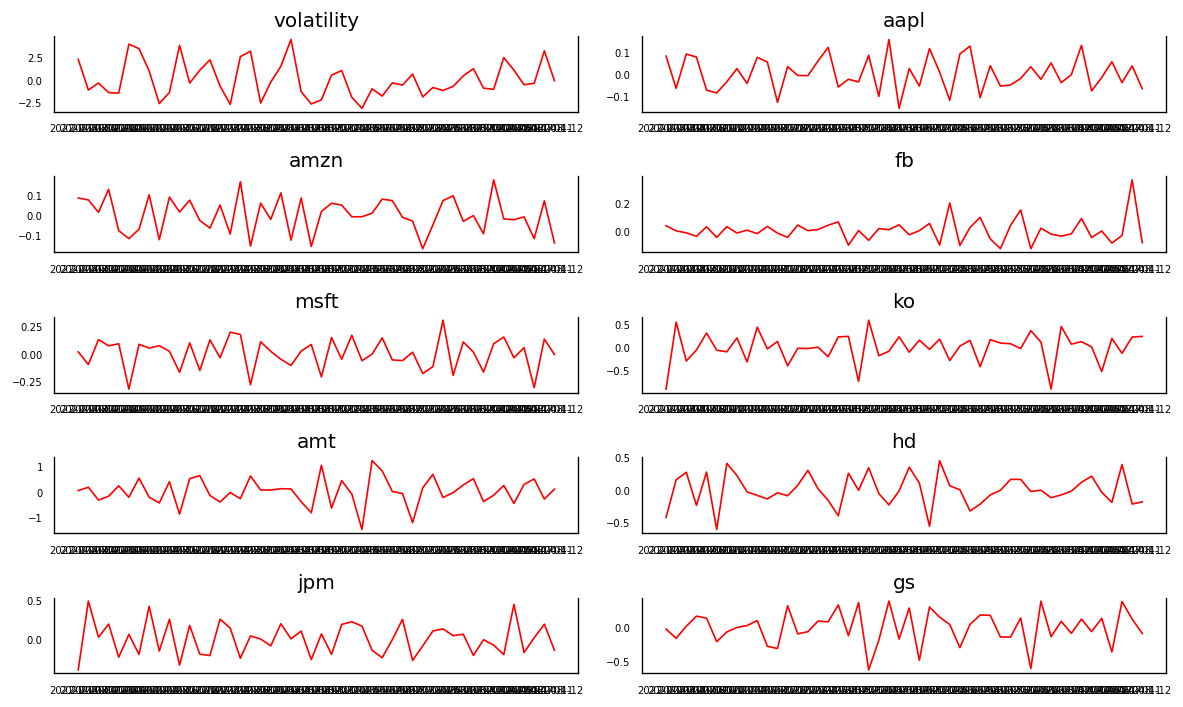

In [231]:
# Plot AFTER data transformation

fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    d = X_train_transformed[X_train_transformed.columns[i]]
    ax.plot(d, color='red', linewidth=1)
    # Decorations
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [410]:
msft_transformed = X_train_transformed[['aapl','volatility']]

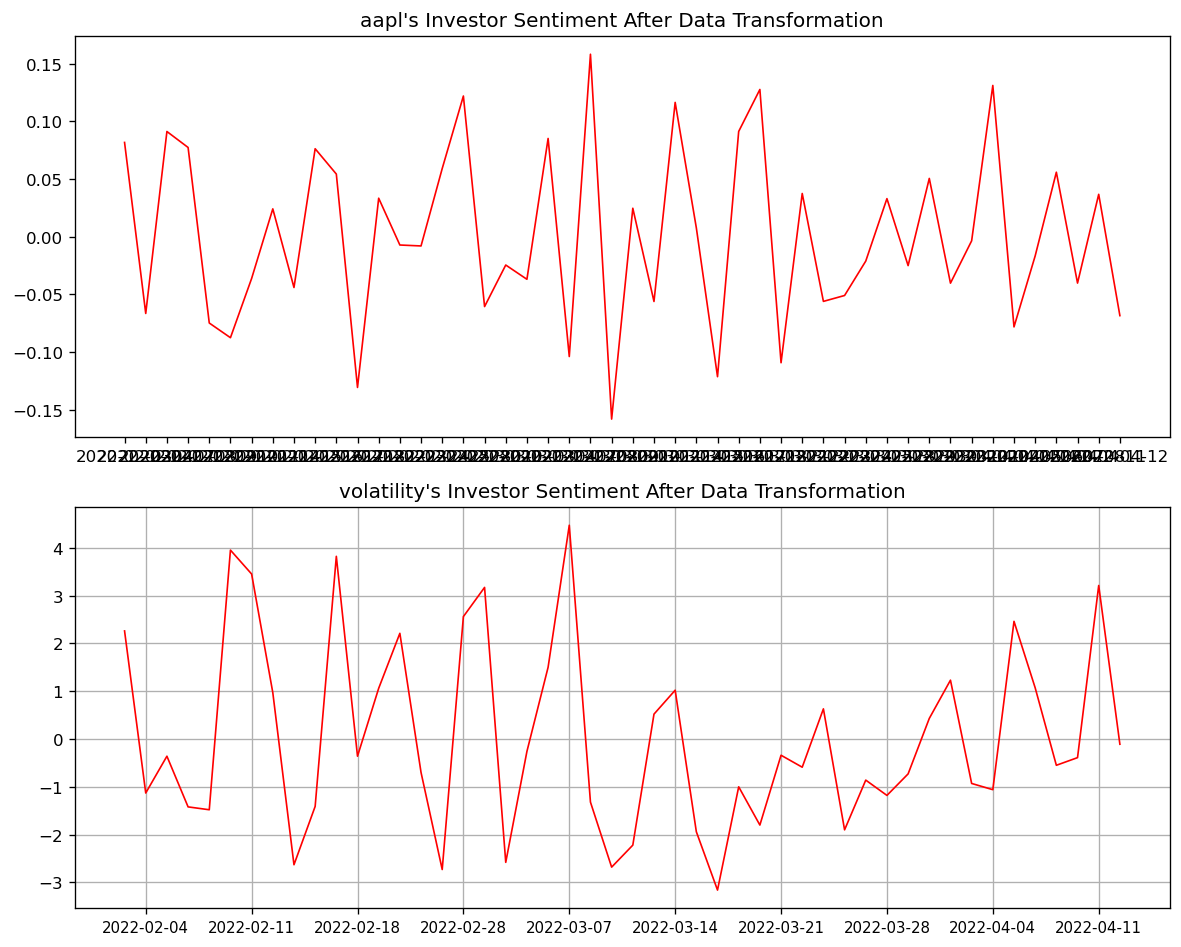

In [411]:
# Plot AFTER data transformation

fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
    d = msft_transformed[msft_transformed.columns[i]]
    ax.plot(d, color='red', linewidth=1)
    # Decorations
    ax.tick_params(labelsize=10)
    plt.xticks(fontsize=9, rotation=0)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax.set_title(msft_transformed.columns[i]+ "'s Investor Sentiment" +' ' + 'After Data Transformation')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
#     ax.spines['top'].set_alpha(0)
#     plt.tick_params(axis='x',direction='in')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
print('Augmented Dickey-Fuller Test: Stock Volatility Time Series')
augmented_dickey_fuller_statistics(X_train_transformed['volatility'])
print('Augmented Dickey-Fuller Test: Apple Investor Sentiment Time Series')
augmented_dickey_fuller_statistics(X_train_transformed['aapl'])
print('Augmented Dickey-Fuller Test: Google Investor Sentiment Time Series')
augmented_dickey_fuller_statistics(X_train_transformed['googl'])
print('Augmented Dickey-Fuller Test: Facebook Investor Sentiment Time Series')
augmented_dickey_fuller_statistics(X_train_transformed['fb'])
print('Augmented Dickey-Fuller Test: Home Depot Investor Sentiment Time Series')
augmented_dickey_fuller_statistics(X_train_transformed['hd'])
print('Augmented Dickey-Fuller Test: Pfizer Investor Sentiment Time Series')
augmented_dickey_fuller_statistics(X_train_transformed['pfe'])
print('Augmented Dickey-Fuller Test: Pfizer Investor Sentiment Time Series')
augmented_dickey_fuller_statistics(X_train_transformed['pfe'])



Augmented Dickey-Fuller Test: Stock Volatility Time Series
ADF Statistic: -6.692503
p-value: 0.000000
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Augmented Dickey-Fuller Test: Apple Investor Sentiment Time Series
ADF Statistic: -7.044118
p-value: 0.000000
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Augmented Dickey-Fuller Test: Google Investor Sentiment Time Series
ADF Statistic: -1.779810
p-value: 0.390531
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
Augmented Dickey-Fuller Test: Facebook Investor Sentiment Time Series
ADF Statistic: -3.393860
p-value: 0.011170
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
Augmented Dickey-Fuller Test: Home Depot Investor Sentiment Time Series
ADF Statistic: -6.340848
p-value: 0.000000
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Augmented Dickey-Fuller Test: Pfizer Investor Sentiment Time Series
ADF Statistic: -8.234356
p-value: 0.000000
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602


In [134]:
result = adfuller(X_train_transformed['volatility'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -6.6925031308167755
p-value: 4.07606154416202e-09
critical_values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Series is stationary


In [135]:
result = adfuller(X_train_transformed['aapl'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -7.044118159042197
p-value: 5.745457496527857e-10
critical_values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Series is stationary


In [136]:
result = adfuller(X_train_transformed['amzn'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -5.627121750628457
p-value: 1.110830129379864e-06
critical_values: {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}
Series is stationary


In [137]:
result = adfuller(X_train_transformed['fb'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -3.3938602789768617
p-value: 0.011169963453986386
critical_values: {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}
Series is stationary


In [138]:
result = adfuller(X_train_transformed['msft'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -7.154045786073921
p-value: 3.08766932239164e-10
critical_values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
Series is stationary


In [139]:
result = adfuller(X_train_transformed['ko'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -4.377125302906942
p-value: 0.00032575823856239347
critical_values: {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}
Series is stationary


In [140]:
result = adfuller(X_train_transformed['amt'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -7.829293587054148
p-value: 6.356375649585042e-12
critical_values: {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}
Series is stationary


In [141]:
result = adfuller(X_train_transformed['hd'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -6.340847705580145
p-value: 2.7571930125926096e-08
critical_values: {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}
Series is stationary


In [142]:
result = adfuller(X_train_transformed['jpm'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -4.0545951674624865
p-value: 0.0011501256729199078
critical_values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}
Series is stationary


In [143]:
result = adfuller(X_train_transformed['gs'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -10.619736690149985
p-value: 5.555149421133954e-19
critical_values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}
Series is stationary


In [144]:
result = adfuller(X_train_transformed['pfe'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -8.234355554913053
p-value: 5.945164430666419e-13
critical_values: {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}
Series is stationary


/var/folders/0j/h3cqhtvd08g48k364rs9wzm40000gn/T/ipykernel_71503/2786619613.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


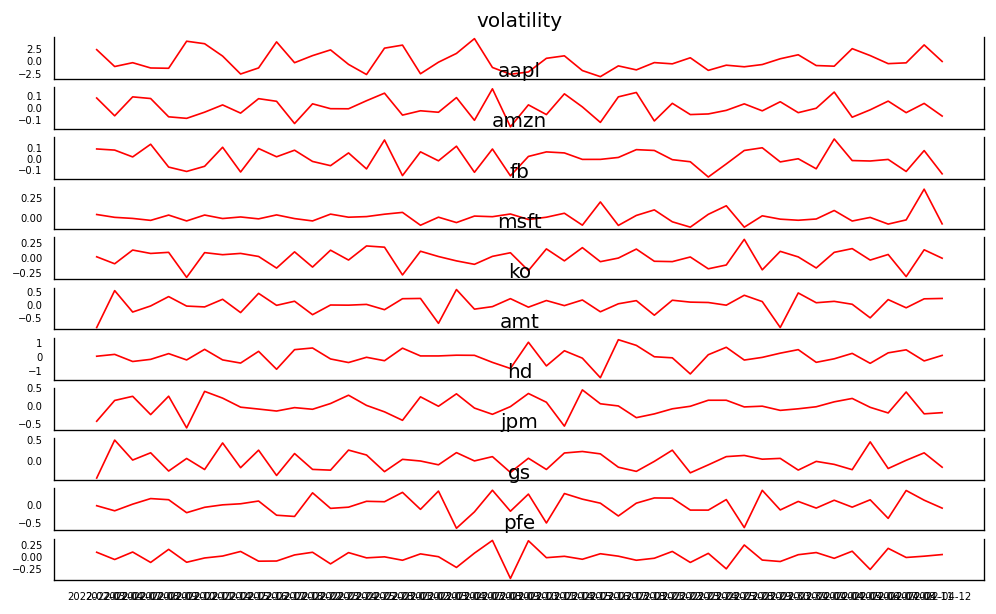

In [145]:
# after transformation
fig, axes = plt.subplots(nrows=11, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    d = X_train_transformed[X_train_transformed.columns[i]]
    ax.plot(d, color='red', linewidth=1)
    # Decorations
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

## Granger’s Causality Test:
- A引起B （A是B的原因）
- 如果你的时间单位是月，你滞后1，就是滞后1个月;滞后3，就是滞后1个季度; 滞后12，就是滞后1年.
- 滞后期就是，A虽然导致B，但可能不是立即显现出这种因果关系，可能A发生后，要隔一段时间才能引起B的变化，取决于你的时间单位，可能是年、月、日
- The structures of the causal relationships between variables were analyzed through the Granger causality approach. The Granger causality test is a statistical hypothesis test for determining whether one time series is useful for forecasting another. If probability value is less than any α level, then the hypothesis would be rejected at that level.
- Granger causality (1969) requires both series to be stationary.
    - If data are non-stationary and co-integrated, then the VAR model will give miscellaneous results

In [540]:
maxlag = 7
test = 'ssr-chi2test'
    
def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value # CORRECTED!!

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

result = grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns) # CHANGE NAME

# Add MultiIndex Header
title = "Granger Causality Test Results (lag=7):" # CHANGE NAME
styler = result.style.set_caption(title).set_table_styles([{'selector': 'caption', # CHANGE NAME
                                                                  'props': [('color', 'black'),
                                                                            ('font-size', '12px'),
                                                                            ('font-style', 'italic'),
                                                                            ('font-weight', 'bold'),
                                                                            ('text-align', 'center')]}])

display(styler)

,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.270400,0.098200,0.196800,0.093100,0.408100,0.144100,0.033100,0.527200,0.029100,0.590400
aapl_y,0.226100,1.000000,0.209200,0.822600,0.021700,0.012800,0.256300,0.000500,0.242500,0.010600,0.000500
amzn_y,0.019700,0.312000,1.000000,0.152300,0.302000,0.078600,0.073900,0.457700,0.006300,0.198600,0.655000
fb_y,0.503400,0.112100,0.228700,1.000000,0.389800,0.041200,0.002300,0.000100,0.114900,0.108500,0.000100
msft_y,0.549200,0.005200,0.203600,0.052200,1.000000,0.077600,0.251600,0.084000,0.008300,0.003400,0.428100
ko_y,0.120300,0.010200,0.000200,0.014100,0.074000,1.000000,0.232500,0.210900,0.478900,0.507400,0.440800
amt_y,0.205500,0.177300,0.013400,0.080900,0.131000,0.095500,1.000000,0.043400,0.017600,0.011900,0.000200
hd_y,0.003300,0.019400,0.086600,0.216600,0.115400,0.539200,0.000000,1.000000,0.092800,0.416600,0.008200
jpm_y,0.108000,0.000000,0.011700,0.384200,0.262700,0.308700,0.016900,0.008600,1.000000,0.028800,0.013100
gs_y,0.090200,0.013100,0.257200,0.316700,0.004500,0.015000,0.573300,0.159200,0.615100,1.000000,0.155900


In [542]:
for maxlag in range(1,13):
    test = 'ssr-chi2test'
    
    def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

        dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

        for c in dataset.columns:
            for r in dataset.index:
                test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
                p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
                if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

                min_p_value = np.min(p_values)
                dataset.loc[r,c] = min_p_value # CORRECTED!!

        dataset.columns = [var + '_x' for var in variables]

        dataset.index = [var + '_y' for var in variables]

        return dataset

    result = grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns) # CHANGE NAME

    # Add MultiIndex Header
    title = "Granger Causality Test Results:" # CHANGE NAME
    styler = result.style.set_caption(title).set_table_styles([{'selector': 'caption', # CHANGE NAME
                                                                      'props': [('color', 'black'),
                                                                                ('font-size', '12px'),
                                                                                ('font-style', 'italic'),
                                                                                ('font-weight', 'bold'),
                                                                                ('text-align', 'center')]}])

    print(maxlag)
    display(styler)

1


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.664700,0.486300,0.690600,0.888400,0.624100,0.152600,0.323500,0.624800,0.816500,0.767200
aapl_y,0.325900,1.000000,0.401500,0.955600,0.907300,0.209300,0.538600,0.715700,0.242500,0.851300,0.989200
amzn_y,0.292000,0.312000,1.000000,0.993100,0.482400,0.104900,0.230500,0.605300,0.805100,0.772100,0.912700
fb_y,0.575400,0.701900,0.385200,1.000000,0.389800,0.748400,0.854100,0.076900,0.394800,0.485400,0.877300
msft_y,0.556500,0.027900,0.375200,0.265400,1.000000,0.214500,0.437600,0.377800,0.008300,0.060500,0.922700
ko_y,0.462800,0.192400,0.437700,0.161000,0.672800,1.000000,0.938300,0.210900,0.832400,0.846300,0.963800
amt_y,0.945100,0.243200,0.635100,0.211300,0.518900,0.155900,1.000000,0.051900,0.019200,0.014800,0.070000
hd_y,0.826100,0.419600,0.201000,0.382900,0.115400,0.855200,0.905500,1.000000,0.528100,0.780100,0.359000
jpm_y,0.108000,0.072400,0.507100,0.384200,0.812600,0.308700,0.828700,0.072600,1.000000,0.835400,0.748400
gs_y,0.508100,0.976100,0.899500,0.316700,0.037000,0.664400,0.730700,0.404700,0.615100,1.000000,0.194300


2


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.497300,0.486300,0.235500,0.828000,0.573600,0.152600,0.270300,0.561900,0.816500,0.767200
aapl_y,0.325900,1.000000,0.259600,0.955600,0.501700,0.209300,0.538600,0.053500,0.242500,0.021500,0.225700
amzn_y,0.189000,0.312000,1.000000,0.826400,0.326100,0.104900,0.223000,0.457700,0.805100,0.198600,0.912700
fb_y,0.575400,0.275900,0.228700,1.000000,0.389800,0.330500,0.411100,0.076900,0.394800,0.485400,0.204800
msft_y,0.556500,0.027900,0.348600,0.083000,1.000000,0.142300,0.437600,0.084000,0.008300,0.006000,0.428100
ko_y,0.266300,0.192400,0.052600,0.131500,0.260300,1.000000,0.657300,0.210900,0.820900,0.507400,0.774200
amt_y,0.205500,0.243200,0.635100,0.211300,0.518900,0.155900,1.000000,0.043400,0.018200,0.014800,0.070000
hd_y,0.266300,0.299900,0.158400,0.382900,0.115400,0.797300,0.155300,1.000000,0.336200,0.780100,0.349800
jpm_y,0.108000,0.014300,0.108100,0.384200,0.734300,0.308700,0.374100,0.041600,1.000000,0.540800,0.597000
gs_y,0.178600,0.013100,0.257200,0.316700,0.027100,0.664400,0.730700,0.159200,0.615100,1.000000,0.194300


3


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.462600,0.421300,0.196800,0.465800,0.408100,0.152600,0.270300,0.561900,0.816500,0.767200
aapl_y,0.325900,1.000000,0.209200,0.822600,0.271600,0.012800,0.442500,0.011300,0.242500,0.021500,0.225700
amzn_y,0.138800,0.312000,1.000000,0.152300,0.302000,0.078600,0.223000,0.457700,0.805100,0.198600,0.912700
fb_y,0.575400,0.275900,0.228700,1.000000,0.389800,0.282500,0.022000,0.076900,0.245000,0.383900,0.204800
msft_y,0.556500,0.027900,0.348600,0.059100,1.000000,0.077600,0.437600,0.084000,0.008300,0.006000,0.428100
ko_y,0.266300,0.192400,0.018300,0.047800,0.260300,1.000000,0.657300,0.210900,0.820900,0.507400,0.731100
amt_y,0.205500,0.243200,0.593400,0.211300,0.518900,0.155900,1.000000,0.043400,0.018200,0.014800,0.070000
hd_y,0.192300,0.031300,0.098700,0.281400,0.115400,0.550000,0.027000,1.000000,0.336200,0.780100,0.170000
jpm_y,0.108000,0.003400,0.023400,0.384200,0.285100,0.308700,0.335100,0.041600,1.000000,0.540800,0.597000
gs_y,0.178600,0.013100,0.257200,0.316700,0.027100,0.317600,0.573300,0.159200,0.615100,1.000000,0.194300


4


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.436900,0.263500,0.196800,0.416300,0.408100,0.152600,0.270300,0.561900,0.635100,0.626700
aapl_y,0.325900,1.000000,0.209200,0.822600,0.200700,0.012800,0.442500,0.010800,0.242500,0.021500,0.225700
amzn_y,0.084700,0.312000,1.000000,0.152300,0.302000,0.078600,0.223000,0.457700,0.805100,0.198600,0.912700
fb_y,0.575400,0.260200,0.228700,1.000000,0.389800,0.041200,0.022000,0.076900,0.233100,0.108500,0.080100
msft_y,0.556500,0.027900,0.348600,0.059100,1.000000,0.077600,0.437600,0.084000,0.008300,0.006000,0.428100
ko_y,0.120300,0.192400,0.018300,0.014100,0.260300,1.000000,0.304800,0.210900,0.694700,0.507400,0.440800
amt_y,0.205500,0.243200,0.559000,0.211300,0.518900,0.155900,1.000000,0.043400,0.018200,0.014800,0.002400
hd_y,0.017800,0.031300,0.098700,0.281400,0.115400,0.550000,0.027000,1.000000,0.092800,0.780100,0.123600
jpm_y,0.108000,0.000000,0.011700,0.384200,0.262700,0.308700,0.335100,0.013500,1.000000,0.540800,0.597000
gs_y,0.170100,0.013100,0.257200,0.316700,0.025600,0.102100,0.573300,0.159200,0.615100,1.000000,0.194300


5


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.270400,0.098200,0.196800,0.416300,0.408100,0.152600,0.270300,0.561900,0.597800,0.626700
aapl_y,0.325900,1.000000,0.209200,0.822600,0.070700,0.012800,0.256300,0.010800,0.242500,0.021500,0.123700
amzn_y,0.084700,0.312000,1.000000,0.152300,0.302000,0.078600,0.223000,0.457700,0.082300,0.198600,0.659400
fb_y,0.575400,0.260200,0.228700,1.000000,0.389800,0.041200,0.022000,0.076900,0.182200,0.108500,0.080100
msft_y,0.556500,0.005200,0.327600,0.052200,1.000000,0.077600,0.437600,0.084000,0.008300,0.006000,0.428100
ko_y,0.120300,0.192400,0.018300,0.014100,0.260300,1.000000,0.304800,0.210900,0.694700,0.507400,0.440800
amt_y,0.205500,0.243200,0.559000,0.080900,0.518900,0.155900,1.000000,0.043400,0.018200,0.014800,0.002000
hd_y,0.003300,0.019400,0.086600,0.281400,0.115400,0.539200,0.027000,1.000000,0.092800,0.780100,0.077500
jpm_y,0.108000,0.000000,0.011700,0.384200,0.262700,0.308700,0.016900,0.011400,1.000000,0.436600,0.571200
gs_y,0.170100,0.013100,0.257200,0.316700,0.008100,0.056800,0.573300,0.159200,0.615100,1.000000,0.194300


6


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.270400,0.098200,0.196800,0.093100,0.408100,0.152600,0.105700,0.527200,0.129200,0.626700
aapl_y,0.299200,1.000000,0.209200,0.822600,0.070700,0.012800,0.256300,0.000500,0.242500,0.021500,0.025300
amzn_y,0.019700,0.312000,1.000000,0.152300,0.302000,0.078600,0.208000,0.457700,0.082300,0.198600,0.655000
fb_y,0.575400,0.141100,0.228700,1.000000,0.389800,0.041200,0.022000,0.064700,0.138800,0.108500,0.080100
msft_y,0.556500,0.005200,0.203600,0.052200,1.000000,0.077600,0.395300,0.084000,0.008300,0.003400,0.428100
ko_y,0.120300,0.010200,0.000300,0.014100,0.074000,1.000000,0.304800,0.210900,0.694700,0.507400,0.440800
amt_y,0.205500,0.177300,0.165000,0.080900,0.146200,0.155900,1.000000,0.043400,0.017600,0.011900,0.002000
hd_y,0.003300,0.019400,0.086600,0.216600,0.115400,0.539200,0.001100,1.000000,0.092800,0.595000,0.023600
jpm_y,0.108000,0.000000,0.011700,0.384200,0.262700,0.308700,0.016900,0.008600,1.000000,0.028800,0.571200
gs_y,0.129800,0.013100,0.257200,0.316700,0.004500,0.056800,0.573300,0.159200,0.615100,1.000000,0.194300


7


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.270400,0.098200,0.196800,0.093100,0.408100,0.144100,0.033100,0.527200,0.029100,0.590400
aapl_y,0.226100,1.000000,0.209200,0.822600,0.021700,0.012800,0.256300,0.000500,0.242500,0.010600,0.000500
amzn_y,0.019700,0.312000,1.000000,0.152300,0.302000,0.078600,0.073900,0.457700,0.006300,0.198600,0.655000
fb_y,0.503400,0.112100,0.228700,1.000000,0.389800,0.041200,0.002300,0.000100,0.114900,0.108500,0.000100
msft_y,0.549200,0.005200,0.203600,0.052200,1.000000,0.077600,0.251600,0.084000,0.008300,0.003400,0.428100
ko_y,0.120300,0.010200,0.000200,0.014100,0.074000,1.000000,0.232500,0.210900,0.478900,0.507400,0.440800
amt_y,0.205500,0.177300,0.013400,0.080900,0.131000,0.095500,1.000000,0.043400,0.017600,0.011900,0.000200
hd_y,0.003300,0.019400,0.086600,0.216600,0.115400,0.539200,0.000000,1.000000,0.092800,0.416600,0.008200
jpm_y,0.108000,0.000000,0.011700,0.384200,0.262700,0.308700,0.016900,0.008600,1.000000,0.028800,0.013100
gs_y,0.090200,0.013100,0.257200,0.316700,0.004500,0.015000,0.573300,0.159200,0.615100,1.000000,0.155900


8


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.076900,0.002600,0.196800,0.093100,0.408100,0.106800,0.033100,0.527200,0.029100,0.590400
aapl_y,0.226100,1.000000,0.209200,0.822600,0.021700,0.012800,0.056700,0.000500,0.242500,0.004100,0.000500
amzn_y,0.019100,0.312000,1.000000,0.106200,0.097700,0.078600,0.073900,0.457700,0.006300,0.198600,0.403800
fb_y,0.503400,0.112100,0.228700,1.000000,0.389800,0.037400,0.000400,0.000000,0.114900,0.108500,0.000000
msft_y,0.530400,0.001300,0.187700,0.052200,1.000000,0.077600,0.103600,0.084000,0.008300,0.000800,0.428100
ko_y,0.120300,0.010200,0.000200,0.014100,0.074000,1.000000,0.155600,0.210900,0.442300,0.507400,0.440800
amt_y,0.205500,0.017900,0.006600,0.080900,0.131000,0.069600,1.000000,0.043400,0.008100,0.001700,0.000200
hd_y,0.000000,0.019400,0.086600,0.216600,0.115400,0.539200,0.000000,1.000000,0.075200,0.184800,0.000400
jpm_y,0.108000,0.000000,0.000000,0.384200,0.209300,0.308700,0.001100,0.000300,1.000000,0.021600,0.013100
gs_y,0.090200,0.013100,0.257200,0.316700,0.004500,0.015000,0.573300,0.159200,0.615100,1.000000,0.155900


9


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.067100,0.002600,0.196800,0.000400,0.408100,0.088000,0.009600,0.059600,0.029100,0.590400
aapl_y,0.122000,1.000000,0.209200,0.822600,0.001200,0.001600,0.044400,0.000300,0.242500,0.004100,0.000500
amzn_y,0.010400,0.245000,1.000000,0.058700,0.097700,0.026100,0.058300,0.457700,0.006300,0.198600,0.115000
fb_y,0.334300,0.112100,0.228700,1.000000,0.389800,0.001800,0.000000,0.000000,0.114900,0.108500,0.000000
msft_y,0.194600,0.001000,0.167800,0.052200,1.000000,0.077600,0.103600,0.000100,0.008300,0.000000,0.428100
ko_y,0.120300,0.010200,0.000200,0.014100,0.074000,1.000000,0.015300,0.210900,0.108700,0.507400,0.440800
amt_y,0.205500,0.017900,0.000200,0.080900,0.131000,0.069600,1.000000,0.043400,0.000000,0.001000,0.000200
hd_y,0.000000,0.019400,0.086600,0.009500,0.115400,0.472800,0.000000,1.000000,0.062800,0.079500,0.000400
jpm_y,0.108000,0.000000,0.000000,0.384200,0.131900,0.001600,0.000700,0.000100,1.000000,0.021600,0.013100
gs_y,0.090200,0.013100,0.177100,0.316700,0.004500,0.015000,0.573300,0.032100,0.570600,1.000000,0.155900


10


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.024200,0.000000,0.107600,0.000100,0.408100,0.088000,0.006700,0.059600,0.029100,0.590400
aapl_y,0.000200,1.000000,0.209200,0.822600,0.000100,0.000300,0.032900,0.000300,0.242500,0.000700,0.000500
amzn_y,0.001200,0.245000,1.000000,0.038600,0.080400,0.026100,0.009300,0.457700,0.006300,0.198600,0.000300
fb_y,0.159700,0.070400,0.006300,1.000000,0.042400,0.001800,0.000000,0.000000,0.114900,0.002100,0.000000
msft_y,0.013200,0.000500,0.000900,0.052200,1.000000,0.077600,0.064500,0.000100,0.008300,0.000000,0.428100
ko_y,0.120200,0.010200,0.000000,0.014100,0.062300,1.000000,0.008200,0.210900,0.013500,0.184400,0.440800
amt_y,0.205500,0.002000,0.000000,0.080900,0.131000,0.014700,1.000000,0.043400,0.000000,0.000100,0.000200
hd_y,0.000000,0.019400,0.000900,0.009300,0.078500,0.302700,0.000000,1.000000,0.012800,0.079500,0.000100
jpm_y,0.108000,0.000000,0.000000,0.384200,0.131900,0.001600,0.000700,0.000000,1.000000,0.021600,0.000400
gs_y,0.090200,0.002900,0.127800,0.316700,0.004500,0.009300,0.573300,0.029000,0.570600,1.000000,0.155900


11


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.000500,0.000000,0.075800,0.000000,0.408100,0.087200,0.000600,0.059600,0.001600,0.296800
aapl_y,0.000200,1.000000,0.103400,0.822600,0.000100,0.000300,0.001400,0.000000,0.010100,0.000700,0.000000
amzn_y,0.000000,0.201100,1.000000,0.000800,0.080400,0.026100,0.009300,0.457700,0.006300,0.198600,0.000300
fb_y,0.159700,0.038600,0.006300,1.000000,0.042400,0.001800,0.000000,0.000000,0.114900,0.002100,0.000000
msft_y,0.000000,0.000000,0.000300,0.004600,1.000000,0.077600,0.003500,0.000100,0.008300,0.000000,0.428100
ko_y,0.000000,0.010200,0.000000,0.000000,0.015100,1.000000,0.008200,0.210900,0.013500,0.058100,0.440800
amt_y,0.000400,0.002000,0.000000,0.080900,0.131000,0.000100,1.000000,0.002300,0.000000,0.000000,0.000200
hd_y,0.000000,0.019400,0.000300,0.005800,0.012700,0.259400,0.000000,1.000000,0.012800,0.003200,0.000000
jpm_y,0.108000,0.000000,0.000000,0.384200,0.131900,0.001600,0.000000,0.000000,1.000000,0.021600,0.000300
gs_y,0.090200,0.000000,0.044000,0.316700,0.002900,0.009300,0.340000,0.000300,0.570600,1.000000,0.107300


12


,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
volatility_y,1.000000,0.000100,0.000000,0.000000,0.000000,0.086500,0.087200,0.000600,0.059600,0.000400,0.006200
aapl_y,0.000000,1.000000,0.000000,0.008700,0.000000,0.000100,0.001400,0.000000,0.010100,0.000000,0.000000
amzn_y,0.000000,0.104100,1.000000,0.000000,0.080400,0.026100,0.000500,0.099400,0.006300,0.054100,0.000300
fb_y,0.159700,0.000000,0.006300,1.000000,0.003600,0.001800,0.000000,0.000000,0.041300,0.000200,0.000000
msft_y,0.000000,0.000000,0.000300,0.000200,1.000000,0.077600,0.000000,0.000000,0.008300,0.000000,0.314200
ko_y,0.000000,0.000100,0.000000,0.000000,0.004600,1.000000,0.008200,0.210900,0.013500,0.019400,0.068000
amt_y,0.000400,0.000000,0.000000,0.080900,0.131000,0.000100,1.000000,0.000000,0.000000,0.000000,0.000000
hd_y,0.000000,0.000800,0.000000,0.002000,0.004100,0.086600,0.000000,1.000000,0.000300,0.003200,0.000000
jpm_y,0.000100,0.000000,0.000000,0.384200,0.131900,0.001000,0.000000,0.000000,1.000000,0.004400,0.000300
gs_y,0.000400,0.000000,0.003800,0.313400,0.002900,0.000000,0.340000,0.000000,0.570600,1.000000,0.039800


In [554]:
# lag6-12
df_granger = pd.DataFrame(np.array([[1.000000,0.270400,0.098200,0.196800,0.093100,0.408100,0.152600,0.105700,0.527200,0.129200,0.626700], 
                                    [1.000000,0.270400,0.098200,0.196800,0.093100,0.408100,0.144100,0.033100,0.527200,0.029100,0.590400], 
                                    [1.000000,0.076900,0.002600,0.196800,0.093100,0.408100,0.106800,0.033100,0.527200,0.029100,0.590400],
                                    [1.000000,0.067100,0.002600,0.196800,0.000400,0.408100,0.088000,0.009600,0.059600,0.029100,0.590400],
                                    [1.000000,0.024200,0.000000,0.107600,0.000100,0.408100,0.088000,0.006700,0.059600,0.029100,0.590400],
                                    [1.000000,0.000500,0.000000,0.075800,0.000000,0.408100,0.087200,0.000600,0.059600,0.001600,0.296800],
                                    [1.000000,0.000100,0.000000,0.000000,0.000000,0.086500,0.087200,0.000600,0.059600,0.000400,0.006200]]),
                            columns=['volatility_x','aapl_x','amzn_x','fb_x','msft_x','ko_x','amt_x','hd_x','jpm_x','gs_x','pfe_x'],
                            index=['L6_volatility_y','L7_volatility_y','L8_volatility_y','L9_volatility_y','L10_volatility_y','L11_volatility_y','L12_volatility_y'],
                         )
df_granger.style.set_caption("Granger Causality Test Results (lag 6-12):")
# df_granger

,volatility_x,aapl_x,amzn_x,fb_x,msft_x,ko_x,amt_x,hd_x,jpm_x,gs_x,pfe_x
L6_volatility_y,1.000000,0.270400,0.098200,0.196800,0.093100,0.408100,0.152600,0.105700,0.527200,0.129200,0.626700
L7_volatility_y,1.000000,0.270400,0.098200,0.196800,0.093100,0.408100,0.144100,0.033100,0.527200,0.029100,0.590400
L8_volatility_y,1.000000,0.076900,0.002600,0.196800,0.093100,0.408100,0.106800,0.033100,0.527200,0.029100,0.590400
L9_volatility_y,1.000000,0.067100,0.002600,0.196800,0.000400,0.408100,0.088000,0.009600,0.059600,0.029100,0.590400
L10_volatility_y,1.000000,0.024200,0.000000,0.107600,0.000100,0.408100,0.088000,0.006700,0.059600,0.029100,0.590400
L11_volatility_y,1.000000,0.000500,0.000000,0.075800,0.000000,0.408100,0.087200,0.000600,0.059600,0.001600,0.296800
L12_volatility_y,1.000000,0.000100,0.000000,0.000000,0.000000,0.086500,0.087200,0.000600,0.059600,0.000400,0.006200


Result:
- These results suggest a more complex  lead-lag relationship between stock returns and investor sentiment than the linear analysis.
    - The lead-lag relationship plays a vital role in financial markets. It is the phenomenon where a certain price-series lags behind and partially replicates the movement of leading time-series. The present research proposes a new technique which helps better identify the lead-lag relationship empirically
- 本文的主要研究成果如下，加入网络搜索指数和新闻指数的投资者情绪指标和股票的波动性具有相关性，但是不同的股票的影响结果不一致，具体表现在部分金融业的波动性与其自身的波动性的滞后项的相关性更强，对本文构建的投资者情绪指数并不显著

## VAR model:

### Lag Order

In [414]:
from statsmodels.tsa.api import VAR

model = VAR(X_train_transformed)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
# Lag = 7, smallest AIC

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Lag Order = 1
AIC :  -36.60438842911906
BIC :  -31.408229207295065
FPE :  1.4391245664745932e-16
HQIC:  -34.64903880747593 

Lag Order = 2
AIC :  -39.984234537195434
BIC :  -29.92670685650541
FPE :  1.2769152636482404e-17
HQIC:  -36.21662438872971 

Lag Order = 3
AIC :  -51.80551217882193
BIC :  -36.790139486064156
FPE :  5.021009093709051e-21
HQIC:  -46.207931999064456 

Lag Order = 4
AIC :  -727.1749192804986
BIC :  -707.1027858989181
FPE :  -0.0
HQIC:  -719.7312045768685 

Lag Order = 5
AIC :  -731.2071155631036
BIC :  -705.9768999522377
FPE :  -0.0
HQIC:  -721.9029917916055 

Lag Order = 6
AIC :  -735.2951101566065
BIC :  -704.8031456643483
FPE :  -0.0
HQIC:  -724.11859919411 

Lag Order = 7
AIC :  -733.4377345058955
BIC :  -697.578104427059
FPE :  -0.0
HQIC:  -720.3796343447935 

Lag Order = 8
AIC :  -726.7939225942167
BIC :  -685.4585979547782
FPE :  -0.0
HQIC:  -711.8483744240664 

Lag Order = 9
AIC :  -723.1756318289472
BIC :  -676.2546623227264
FPE :  -0.0
HQIC:  -706.34079173

In [158]:
for lag in range(7, 13):
    mod = VAR(X_train_transformed)
    # res = mod.fit(maxlags=2, ic='aic')
    res = mod.fit(lag)
    print(lag)
    print(res.summary())

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


7
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, May, 2022
Time:                     22:51:27
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -697.578
Nobs:                     41.0000    HQIC:                  -720.380
Log likelihood:           15253.5    FPE:                   -0.00000
AIC:                     -733.438    Det(Omega_mle):        -0.00000
--------------------------------------------------------------------
Results for equation volatility
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.172290              NAN              NAN             NAN
L1.volatility         0.814999         0.000000    196689500.663           0.000
L1.aapl              -1.466528         0.000001     -

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, May, 2022
Time:                     22:51:28
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -685.459
Nobs:                     40.0000    HQIC:                  -711.848
Log likelihood:           14890.5    FPE:                   -0.00000
AIC:                     -726.794    Det(Omega_mle):        -0.00000
--------------------------------------------------------------------
Results for equation volatility
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.142896         0.000000    -32930535.189           0.000
L1.volatility         0.626026         0.000000     69767284.088           0.000
L1.aapl              -0.536553              NAN        

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, May, 2022
Time:                     22:51:28
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -676.255
Nobs:                     39.0000    HQIC:                  -706.341
Log likelihood:           14593.2    FPE:                   -0.00000
AIC:                     -723.176    Det(Omega_mle):        -0.00000
--------------------------------------------------------------------
Results for equation volatility
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.070901         0.000000    -17322707.355           0.000
L1.volatility         0.450069              NAN              NAN             NAN
L1.aapl              -0.010640         0.000000       -

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, May, 2022
Time:                     22:51:29
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -658.122
Nobs:                     38.0000    HQIC:                  -692.019
Log likelihood:           14131.9    FPE:                   -0.00000
AIC:                     -710.740    Det(Omega_mle):        -0.00000
--------------------------------------------------------------------
Results for equation volatility
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.069496              NAN              NAN             NAN
L1.volatility          0.273853              NAN              NAN             NAN
L1.aapl                0.165593              NAN   

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, May, 2022
Time:                     22:51:30
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -645.406
Nobs:                     37.0000    HQIC:                  -683.235
Log likelihood:           13785.4    FPE:                   -0.00000
AIC:                     -703.834    Det(Omega_mle):        -0.00000
--------------------------------------------------------------------
Results for equation volatility
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.088823         0.000000    -18888069.790           0.000
L1.volatility          0.350276              NAN              NAN             NAN
L1.aapl                0.184302         0.000000   

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, May, 2022
Time:                     22:51:31
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -634.627
Nobs:                     36.0000    HQIC:                  -676.518
Log likelihood:           13482.7    FPE:                   -0.00000
AIC:                     -698.979    Det(Omega_mle):        -0.00000
--------------------------------------------------------------------
Results for equation volatility
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.082935         0.000000    -10500385.941           0.000
L1.volatility          0.335767              NAN              NAN             NAN
L1.aapl                0.042663              NAN   

In [166]:
# lag = 7
mod = VAR(X_train_transformed)
res_7 = mod.fit(7)
print(res_7.summary())

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, May, 2022
Time:                     23:04:49
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -697.578
Nobs:                     41.0000    HQIC:                  -720.380
Log likelihood:           15253.5    FPE:                   -0.00000
AIC:                     -733.438    Det(Omega_mle):        -0.00000
--------------------------------------------------------------------
Results for equation volatility
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.172290              NAN              NAN             NAN
L1.volatility         0.814999         0.000000    196689500.663           0.000
L1.aapl              -1.466528         0.000001     -28

In [469]:
np_corr = res_7.resid_acorr(nlags=7)
index_labels = list(X_train_transformed.columns)
df_corr = pd.DataFrame(np_corr[0], columns=X_train_transformed.columns, index=index_labels)
df_corr

,volatility,aapl,amzn,fb,msft,ko,amt,hd,jpm,gs,pfe
volatility,1.000000,0.295409,0.150467,0.356376,-0.345014,-0.266747,0.126305,0.032985,0.066368,-0.001685,-0.204159
aapl,0.295409,1.000000,0.577851,0.139752,-0.082548,0.383878,-0.161134,-0.036963,0.235632,-0.125963,0.360493
amzn,0.150467,0.577851,1.000000,-0.095228,-0.264678,0.386228,-0.261193,0.010801,0.179487,-0.352211,0.534603
fb,0.356376,0.139752,-0.095228,1.000000,-0.192976,-0.125812,-0.074398,-0.290962,0.146309,0.470573,-0.322104
msft,-0.345014,-0.082548,-0.264678,-0.192976,1.000000,-0.127558,0.233622,0.109575,-0.104684,0.149326,-0.080201
ko,-0.266747,0.383878,0.386228,-0.125812,-0.127558,1.000000,-0.294769,0.030298,0.195864,-0.463820,0.408652
amt,0.126305,-0.161134,-0.261193,-0.074398,0.233622,-0.294769,1.000000,0.095546,-0.047055,0.347017,-0.146040
hd,0.032985,-0.036963,0.010801,-0.290962,0.109575,0.030298,0.095546,1.000000,0.217217,-0.311168,0.265041
jpm,0.066368,0.235632,0.179487,0.146309,-0.104684,0.195864,-0.047055,0.217217,1.000000,-0.040941,0.183287
gs,-0.001685,-0.125963,-0.352211,0.470573,0.149326,-0.463820,0.347017,-0.311168,-0.040941,1.000000,-0.235266


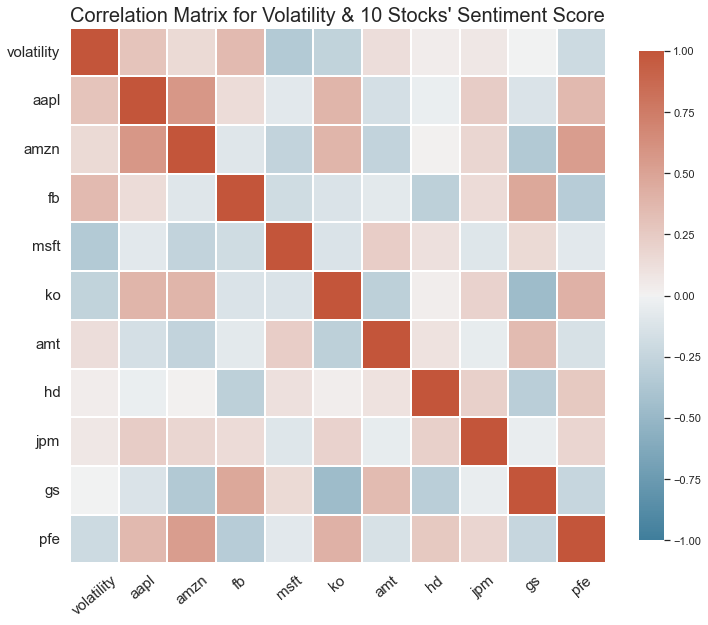

In [518]:
# Define a nice color map for our heatmap
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(12,12)})
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(
        data=df_corr,  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}  # shrink the scale a bit
    )
# adjust y-axis ticks for legibility
plt.tick_params(axis='both',labelsize=14)
plt.yticks(fontsize=15, rotation=0)  
plt.xticks(fontsize=15, rotation=40)
plt.title("Correlation Matrix for Volatility & 10 Stocks' Sentiment Score", fontsize=20)
# show the heatmap
plt.show()

In [516]:
mask = np.array([[False,  True,  True,  True,  True,  True,  True,  True,  True, True,  True],
                [False, True,  True,  True,  True,  True,  True,  True,  True, True,  True],
                [False, True, True,  True,  True,  True,  True,  True,  True, True,  True],
                [False, True, True, True,  True,  True,  True,  True,  True, True,  True],
                [False, True, True, True, True,  True,  True,  True,  True, True,  True],
                [False, True, True, True, True,  True,  True,  True,  True, True,  True],
                [False, True, True, True, True,  True,  True,  True,  True, True,  True],
                [False, True, True, True, True,  True,  True,  True,  True, True,  True],
                [False, True, True, True, True,  True,  True,  True,  True, True,  True],
                [False, True, True, True, True,  True,  True,  True,  True, True,  True],
                [False, True, True, True, True,  True,  True,  True,  True, True,  True]])

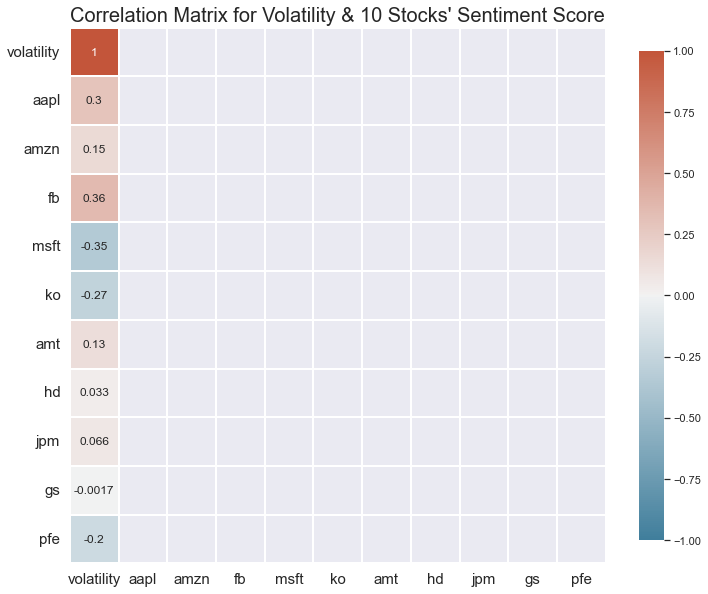

In [519]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(
        data=df_corr,  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75},  # shrink the scale a bit
        mask=mask,
        annot=True)

# adjust y-axis ticks for legibility
plt.tick_params(axis='both',labelsize=14)
plt.yticks(fontsize=15, rotation=0)  
plt.xticks(fontsize=15, rotation=0)
plt.title("Correlation Matrix for Volatility & 10 Stocks' Sentiment Score", fontsize=20)
# show the heatmap
plt.show()

(array([0.5]), [Text(0.5, 0, 'volatility')])

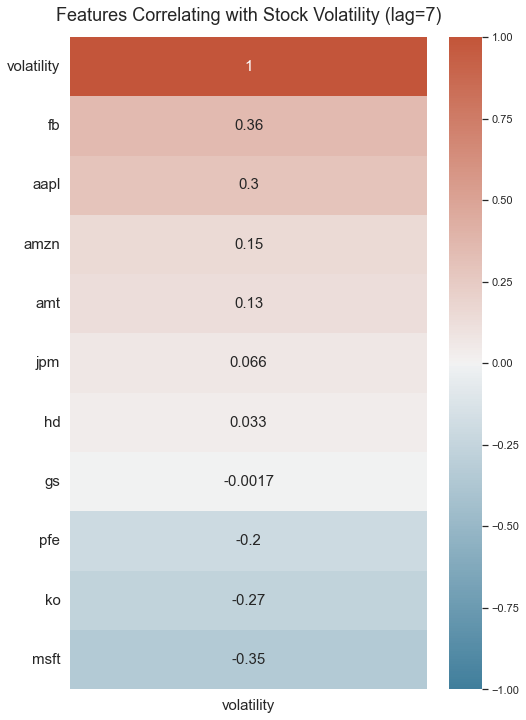

In [534]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_corr[['volatility']].sort_values(by='volatility', ascending=False), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True,
                      annot_kws={"fontsize":15}, 
                      cmap=cmap)
heatmap.set_title('Features Correlating with Stock Volatility (lag=7)', fontdict={'fontsize':18}, pad=16)
plt.tick_params(axis='both',labelsize=14)
plt.yticks(fontsize=15, rotation=0)  
plt.xticks(fontsize=15, rotation=0)
# plt.title("Correlation Matrix for Volatility & 10 Stocks' Sentiment Score", fontsize=20)

In [417]:
mod = VAR(X_train_transformed)
res_12 = mod.fit(12)
print(res_12.summary())

/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/hanyulun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/var_model.py:1450: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 22, May, 2022
Time:                     18:16:40
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -634.627
Nobs:                     36.0000    HQIC:                  -676.518
Log likelihood:           13482.7    FPE:                   -0.00000
AIC:                     -698.979    Det(Omega_mle):        -0.00000
--------------------------------------------------------------------
Results for equation volatility
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.082935         0.000000    -10500385.941           0.000
L1.volatility          0.335767              NAN              NAN             NAN
L1.aapl                0.042663              NAN   

Result:
- lag = 1
    - FB & volatility's Correlation is 0.112342
    - MSFT & volatility's Correlation is -0.333643 
- lag = 5
    - FB is 0.448150
- lag = 7
    - FB & volatility's Correlation is 0.110565
    - HD & volatility's Correlation is 0.143869
    - MSFT & volatility's Correlation is -0.332024
- 假设石油价格与机票价格直接相关，相关系数为+0.95。石油价格与机票价格之间存在很强的正相关关系，价值接近+1。因此，如果石油价格下降，机票价格也会下降，如果石油价格上涨，机票价格也会下降。
- 暖气费价格与室外温度呈负相关关系。相关系数计算为-0.96。这种强负相关关系表明，当室外温度下降时，采暖费用会增加(反之亦然)。
- 相关系数与0越接近，说明两者越不相关。例如，算出电视与温度的相关系数最接近0，说明电视一般不受温度的影响。

## Visualization

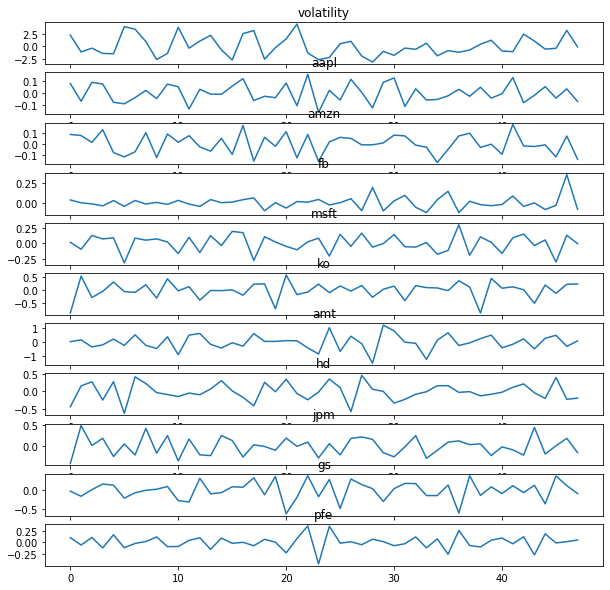

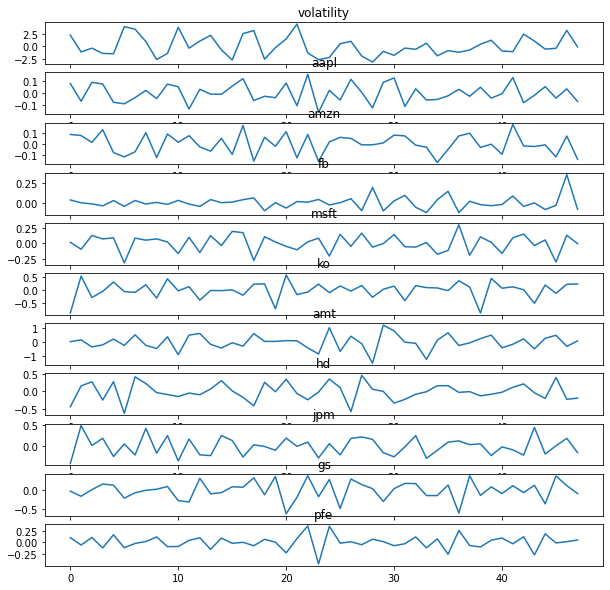

In [199]:
res_7.plot()

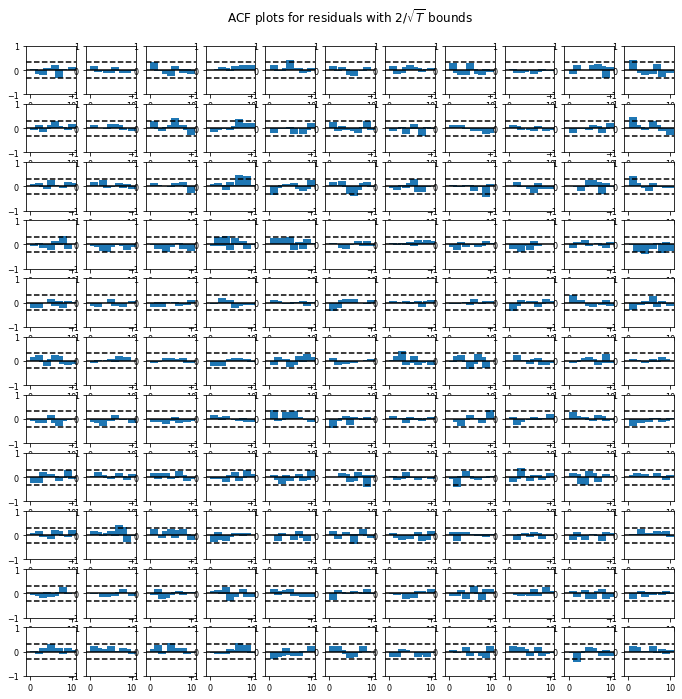

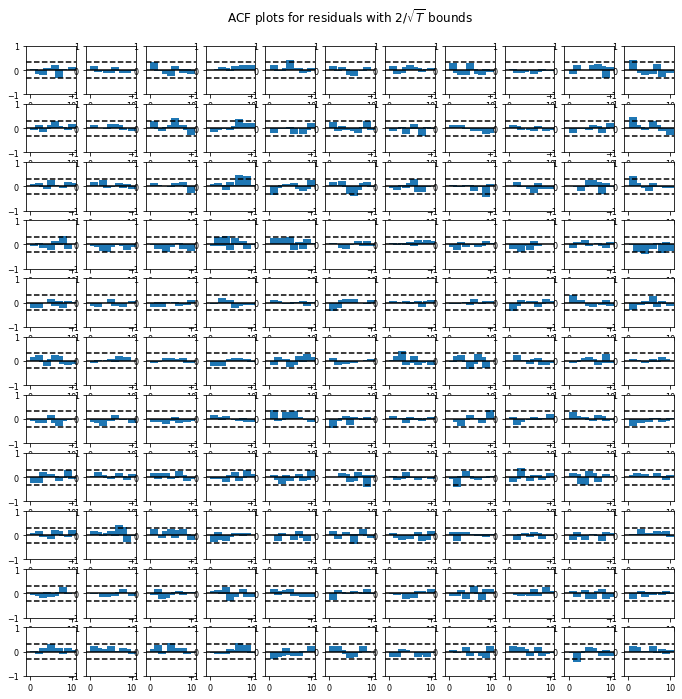

In [200]:
res_7.plot_acorr()

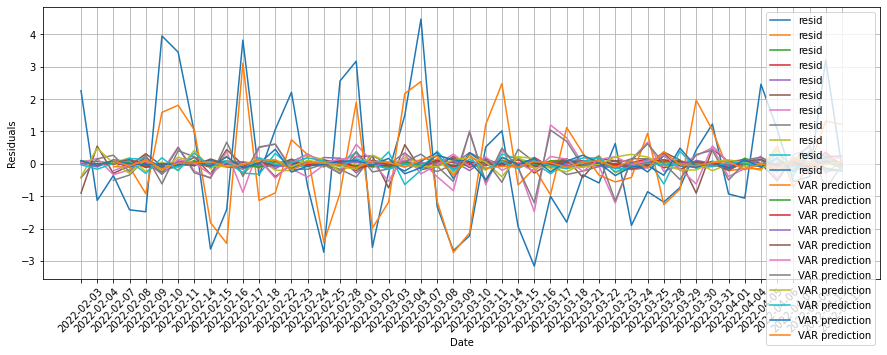

In [203]:
y_fitted = res.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(X_train_transformed, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.legend(loc="upper right")
plt.grid(True)

## Prediction:

In [182]:
lag_order = res_7.k_ar
print(lag_order)

7


In [195]:
# Get the lag order
lag_order = res_7.k_ar # CHANGE res
print(lag_order)
# Input data for forecasting
input_data = X_train_transformed.values[-lag_order:]
print(input_data)
# forecasting
pred = res_7.forecast(y=input_data, steps=n_obs) # CHANGE res
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred)

7
[[-1.05999900e+00  1.31113530e-01  1.73848036e-01  9.00906261e-02
   9.06365888e-02  1.26190521e-01 -1.44444716e-01  1.13138824e-01
  -7.98257166e-02  1.20838518e-01 -2.81072562e-02]
 [ 2.46000100e+00 -7.80973118e-02 -1.91799691e-02 -4.33225983e-02
   1.51884080e-01  1.08058705e-02  2.37036947e-01  2.08177406e-01
  -2.02189749e-01 -6.71150588e-02  1.21673931e-01]
 [ 1.06999900e+00 -1.65698422e-02 -2.32579100e-02  2.43514629e-03
  -3.59214195e-02 -5.23107209e-01 -4.62924757e-01 -4.09052181e-02
   4.41802048e-01  1.32420296e-01 -2.63363499e-01]
 [-5.50001000e-01  5.59405437e-02 -9.16231548e-03 -8.20543881e-02
   5.55485503e-02  1.94934614e-01  2.75369557e-01 -1.98621846e-01
  -1.75639083e-01 -3.71535706e-01  1.82548232e-01]
 [-3.89999000e-01 -4.01428561e-02 -1.16844239e-01 -2.90645497e-02
  -3.06072591e-01 -1.27540088e-01  4.87555456e-01  3.88763405e-01
   1.46250682e-02  3.85024249e-01 -1.04921741e-02]
 [ 3.21000100e+00  3.67851399e-02  7.01229864e-02  3.60179849e-01
   1.32618943e-01

## Invert the transformation:

In [196]:
# inverting transformation
def invert_transformation(X_train, pred):
    forecast = pred.copy()
    columns = X_train.columns
    for col in columns:
        forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast
output = invert_transformation(X_train, pred)

#combining predicted and real data set
combine = pd.concat([output['volatility_pred'], X_test['volatility']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.volatility_pred /row.volatility *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=2)
combine = combine.reset_index()
combine = combine.sort_values(by='date', ascending=False)

In [197]:
combine

,date,volatility_pred,volatility,accuracy
4,2022-04-20,21.28,20.32,104.75%
3,2022-04-19,25.77,21.37,120.60%
2,2022-04-18,22.57,22.17,101.79%
1,2022-04-14,17.50,22.70,77.09%
0,2022-04-13,17.78,21.82,81.47%


In [204]:
# plot for vol and vol_pred in 60 trading days

## Evaluation:

In [198]:
#Forecast bias
forecast_errors = [combine['volatility'][i]- combine['volatility_pred'][i] for i in range(len(combine['volatility']))]
bias = sum(forecast_errors) * 1.0/len(combine['volatility'])
print('Bias: %f' % bias)
print('Mean absolute error:', mean_absolute_error(combine['volatility'].values, combine['volatility_pred'].values))
print('Mean squared error:', mean_squared_error(combine['volatility'].values, combine['volatility_pred'].values))
print('Root mean squared error:', math.sqrt(mean_squared_error(combine['volatility'].values, combine['volatility_pred'].values)))

Bias: 0.696000
Mean absolute error: 2.999999999999999
Mean squared error: 12.760639999999995
Root mean squared error: 3.5722038015768356


Result:
- Mean absolute error tells us how big of an error we can expect from the forecast on average. Our error rates are quite low here indicating we have the right fit of the model.
- MAE越小越好
- model need to improve
    - NLP:根据一句话的前十个words predict后面的内容

# Visualization 

In [213]:
import pandas as pd

# aapl      amzn        fb      msft        ko       amt        hd       jpm        gs       pfe
# initialize list of lists
data = [['Apple', 'aapl'], ['Amazon', 'amzn'], ['Meta', 'fb'], ['Microsoft','msft'], ['Coca-Cola', 'ko'], ['American Tower', 'amt'], ['Home Depot', 'hd'], ['JPMorgan Chase', 'jpm'], ['Goldman Sachs','gs'], ['Pfizer','pfe']]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Stock', 'Ticker'])
  
# print dataframe.
df.sort_values(by=['Stock'],inplace = True)
df.reset_index(drop=True, inplace=True)
df

,Stock,Ticker
0,Amazon,amzn
1,American Tower,amt
2,Apple,aapl
3,Coca-Cola,ko
4,Goldman Sachs,gs
5,Home Depot,hd
6,JPMorgan Chase,jpm
7,Meta,fb
8,Microsoft,msft
9,Pfizer,pfe
